# ETL thesis
This notebook gets thesis data from Pure and creates several visualisations.

In [1]:
import requests
from requests.auth import HTTPBasicAuth
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# Load API token from secrets file (.env)
%load_ext dotenv
%dotenv
import os

api_token = os.getenv("API_TOKEN")

### Config

In [4]:


# TODO: URL opknippen in parameters
# Default page size is 10
#url = 'https://crisapi.library.maastrichtuniversity.nl/api/ResearchOutput?types=/dk/atira/pure/researchoutput/researchoutputtypes/thesis/doc&year_begin=2010&year_end=2020&extra=personAssociations,publicationStatuses'

# Page size modified
url = 'https://crisapi.library.maastrichtuniversity.nl/api/ResearchOutput?types=/dk/atira/pure/researchoutput/researchoutputtypes/thesis/doc&size=500&year_begin=2010&year_end=2020&extra=personAssociations,publicationStatuses'

headers = {'Accept': 'application/xml', 'UBKey': api_token}

### Start of script

Perform API call

In [5]:
out = requests.get(url, headers=headers)

Convert response to XML tree

In [11]:
string_xml = ET.fromstring(out.content)
tree = ET.ElementTree(string_xml)
#ET.dump(tree)
root = tree.getroot()

# TODO: Use better method to select items-tag
items = root[2]

#### ETL - Publication date
Using an XPath to find all years

In [13]:
years = []
for pub_date in items.findall('.//thesis/publicationStatuses/publicationStatus/publicationDate'):
    years.append(pub_date.find('year').text)

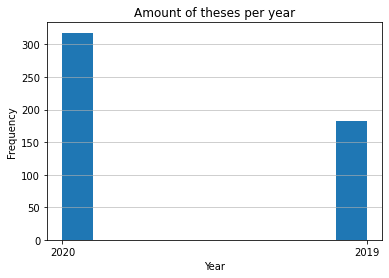

In [14]:
plt.hist(x=years)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Amount of theses per year')
plt.show()

#### ETL - Publication language
Using an Xpath to find all languages

In [15]:
languages = []
for lang in items.findall('.//thesis/language/term/text'):
    #locale=lang.attrib
    languages.append(lang.text)

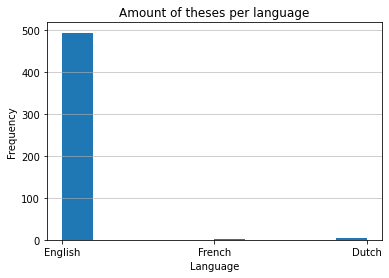

In [16]:
plt.hist(x=languages)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.title('Amount of theses per language')
plt.show()